# Finance Complaint Project

## Exploratory Data Analysis

### Problem Statement
    
The Consumer Financial Protection Bureau (CFPB) is a federal U.S. agency that acts as a mediator when disputes arise between financial institutions and consumers. Via a web form, consumers can send the agency a narrative of their dispute.

This project made using Natural Language Processing (NLP) with machine learning models to process the issues text written in the complaint and other features in the dataset to predict if the customer will dispute or not.

Industry use case: An NLP + Machine learning model would make the classification of whether the consumer will dispute with the companty or not and thus helping the company to prioritize the complaint based on the prediction.

Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import os

warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_columns',50)

In [2]:
os.chdir("D:\\Bala\\Project_Inprogress\\Finance\\")
os.getcwd()

'D:\\Bala\\Project_Inprogress\\Finance'

### Reading the Input file in Parquet Format

In [3]:
df = pd.read_parquet('input.parquet')
df.head(3)

,company,company_public_response,company_response,complaint_id,complaint_what_happened,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,sub_issue,sub_product,submitted_via,tags,timely,zip_code
0,Portfolio Recovery Associates,None,None,ID000000,Yes,Consent not provided,Yes,2023-08-03,2023-01-26,Billing disputes,Retail store card,TX,None,Store credit card,Postal mail,None,Yes,None
1,Fifth Third Bank,None,Company believes it acted appropriately,ID000001,Yes,Consent not provided,No,2024-01-09,2024-06-13,Payment processing issues,Auto loan,PA,Improper reporting,None,Phone,Unresolved complaint,Yes,None
2,Bank of America,None,None,ID000002,Yes,Consent not provided,No,2023-06-14,2022-05-13,Unauthorized charges,Insurance,CO,None,None,Web,None,Yes,None


### Unique values in target Column

In [4]:
df["consumer_disputed"].unique()

array(['Yes', 'No'], dtype=object)

In [5]:
df.consumer_disputed.value_counts(normalize=True)*100

consumer_disputed
No     79.8604
Yes    20.1396
Name: proportion, dtype: float64

### Shape of the dataset

In [6]:
df.shape

(250000, 18)

### Null Values

In [7]:
df.isnull().sum()

company                           0
company_public_response      192887
company_response             192988
complaint_id                      0
complaint_what_happened           0
consumer_consent_provided         0
consumer_disputed                 0
date_received                     0
date_sent_to_company              0
issue                             0
product                           0
state                             0
sub_issue                    195207
sub_product                  195131
submitted_via                 12298
tags                         193264
timely                            0
zip_code                     187505
dtype: int64

### Replace empty strings into Nan Value

In [8]:
df.replace("", np.nan, inplace=True)

### Summary of the Dataset

In [9]:
df = df.astype(dtype='O')

In [10]:
df.describe().T

,count,unique,top,freq
company,250000,23,US Bank,11085
company_public_response,57113,11,Closed with non-monetary relief,5350
company_response,57012,11,Closed with explanation,5249
complaint_id,250000,250000,ID000000,1
complaint_what_happened,250000,2,Yes,224855
consumer_consent_provided,250000,2,Consent not provided,125064
consumer_disputed,250000,2,No,199651
date_received,250000,1096,2024-05-25 00:00:00,278
date_sent_to_company,250000,1096,2024-07-22 00:00:00,276
issue,250000,13,Billing disputes,19476


### Check Data types of dataset column wise

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   company                    250000 non-null  object
 1   company_public_response    57113 non-null   object
 2   company_response           57012 non-null   object
 3   complaint_id               250000 non-null  object
 4   complaint_what_happened    250000 non-null  object
 5   consumer_consent_provided  250000 non-null  object
 6   consumer_disputed          250000 non-null  object
 7   date_received              250000 non-null  object
 8   date_sent_to_company       250000 non-null  object
 9   issue                      250000 non-null  object
 10  product                    250000 non-null  object
 11  state                      250000 non-null  object
 12  sub_issue                  54793 non-null   object
 13  sub_product                54869 non-null   

# EXPLORING DATA

In [12]:
numerical_features = [i for i in df.columns if df[i].dtype != 'O']
Categorical_features = [i for i in df.columns if df[i].dtype == 'O' ]

print(f"We have  {len(numerical_features)} numerical columns in our dataset: {numerical_features}")
print(f"We have  {len(Categorical_features)} categorical columns in our dataset: {Categorical_features}")

We have  0 numerical columns in our dataset: []
We have  18 categorical columns in our dataset: ['company', 'company_public_response', 'company_response', 'complaint_id', 'complaint_what_happened', 'consumer_consent_provided', 'consumer_disputed', 'date_received', 'date_sent_to_company', 'issue', 'product', 'state', 'sub_issue', 'sub_product', 'submitted_via', 'tags', 'timely', 'zip_code']


### Checking Null Values

In [13]:
print(df.shape)
print(df.shape[0])

(250000, 18)
250000


In [14]:
df.isnull().sum()

company                           0
company_public_response      192887
company_response             192988
complaint_id                      0
complaint_what_happened           0
consumer_consent_provided         0
consumer_disputed                 0
date_received                     0
date_sent_to_company              0
issue                             0
product                           0
state                             0
sub_issue                    195207
sub_product                  195131
submitted_via                 12298
tags                         193264
timely                            0
zip_code                     187505
dtype: int64

In [15]:
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending=False)
missing

,0
sub_issue,78.0828
sub_product,78.0524
tags,77.3056
company_response,77.1952
company_public_response,77.1548
zip_code,75.0020
submitted_via,4.9192
product,0.0000
timely,0.0000
state,0.0000


In [16]:
drop_columns = ['tags', 'complaint_what_happened', 'company_public_response', 'sub_issue', 'sub_product', 'zip_code', 'complaint_id']
df.drop(columns=drop_columns, inplace=True)
df.head()

,company,company_response,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,submitted_via,timely
0,Portfolio Recovery Associates,None,Consent not provided,Yes,2023-08-03 00:00:00,2023-01-26 00:00:00,Billing disputes,Retail store card,TX,Postal mail,Yes
1,Fifth Third Bank,Company believes it acted appropriately,Consent not provided,No,2024-01-09 00:00:00,2024-06-13 00:00:00,Payment processing issues,Auto loan,PA,Phone,Yes
2,Bank of America,None,Consent not provided,No,2023-06-14 00:00:00,2022-05-13 00:00:00,Unauthorized charges,Insurance,CO,Web,Yes
3,Chase Bank,None,Consent not provided,No,2022-02-13 00:00:00,2024-08-31 00:00:00,Payment processing issues,Personal loan,WA,Web,Yes
4,American Express Company,None,Consent not provided,Yes,2023-10-03 00:00:00,2022-02-26 00:00:00,Service not received,Auto loan,TX,Web,No


### Unique Values in the columns

In [17]:
for col in df.columns:
    print(f'{col} : {len(df[col].unique())}')

company : 23
company_response : 12
consumer_consent_provided : 2
consumer_disputed : 2
date_received : 1096
date_sent_to_company : 1096
issue : 13
product : 13
state : 20
submitted_via : 5
timely : 2


# VISUALIZATION

### Visualize the target feature

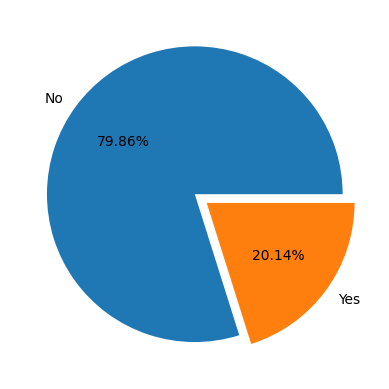

In [19]:
percentage = df.consumer_disputed.value_counts(normalize=True)*100
labels = ['No','Yes']

# pull is given as a fraction of the pie radius
explode = (0, 0.1)
plt.pie(percentage,labels=labels, explode=explode, autopct= '%1.2f%%')
plt.show()

## Imabalanced Dataset

From the above chart, it clearly shows that the dataset is an imbalanced dataset. Where the value of 'No' is around 80% and 'Yes' is only 20%

### Visualize product percentage in a pie chart

In [20]:

product_percentage = df['product'].value_counts (normalize=True)*100 
product_percentage


product
Credit card          7.7532
Retail store card    7.7496
Credit reporting     7.7452
Auto loan            7.7392
Business loan        7.7332
Home equity loan     7.7288
Personal loan        7.7272
Mortgage             7.7208
Insurance            7.6920
Student loan         7.6860
Debt collection      7.6152
Payment plan         7.5688
Bank account         7.5408
Name: proportion, dtype: float64

Visualize product percentage in a pie chart

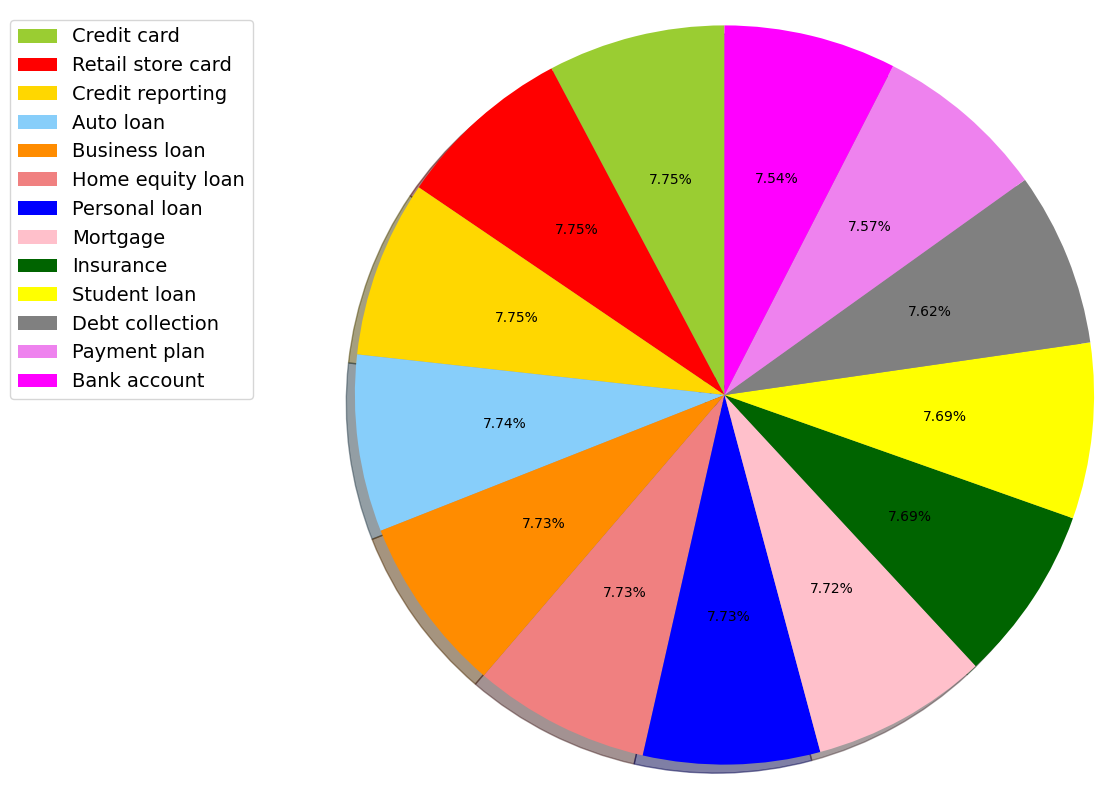

In [21]:
product_percentage = df['product'].value_counts (normalize=True)*100 
product_labels = product_percentage.index
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'darkorange', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow', 'grey', 'violet', 'magenta', 'cyan']
fig, ax = plt.subplots(figsize =(18, 10))
patches, texts, _ = ax.pie(product_percentage, startangle=90, shadow=True, colors=colors, radius=1.2, autopct='%1.2f%%')
plt.legend(patches, product_labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=14)
plt.show()


States & their impact on target feature

In [22]:
top_states = df.state.value_counts(normalize=True)*100
top_states.to_frame()[:10]

,proportion
state,
CA,5.0660
CO,5.0588
NJ,5.0580
NC,5.0520
VA,5.0500
FL,5.0288
MA,5.0240
MN,5.0188
AZ,5.0128


<Axes: xlabel='state'>

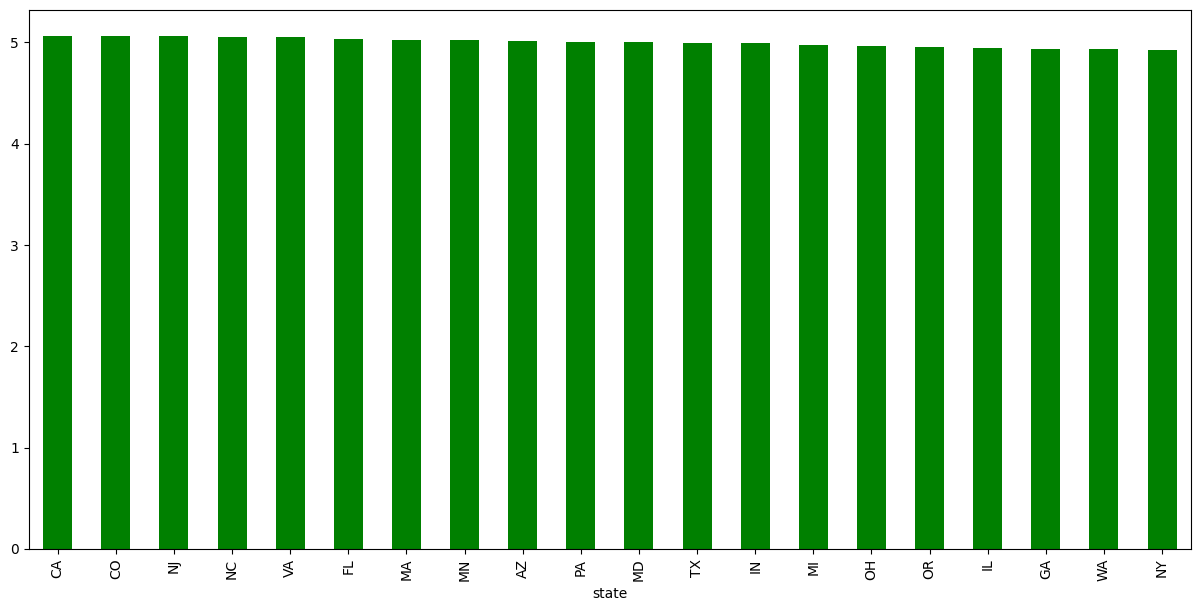

In [23]:
plt.subplots(figsize=(15,7))
top_states.plot(kind='bar',color='green')


Insights

From the above chart, we need to focus more on states like "CO", "CA", "MI", "VA", "MN" as they were thee states getting higher dispute compare to other states

## Company Response and its effect on Target Feature

In [27]:
df.groupby('company_response')['consumer_disputed'].value_counts(normalize=True).to_frame()*100

proportion
company_response                        consumer_disputed            
Additional documentation requested      No                  79.426482
                                        Yes                 20.573518
Closed with explanation                 No                  79.424652
                                        Yes                 20.575348
Closed with monetary relief             No                  78.734756
                                        Yes                 21.265244
Closed with non-monetary relief         No                  79.479207
                                        Yes                 20.520793
Company believes it acted appropriately No                  80.251938
                                        Yes                 19.748062
Company has responded to the consumer   No                  80.392530
                                        Yes                 19.607470
Customer service attempted to contact   No                  81.296758
                                        Yes                 18.703242
In progress                             No                  79.561201
                                        Yes                 20.438799
Investigation ongoing                   No                  80.408725
                                        Yes                 19.591275
No response provided                    No                  80.721951
                                        Yes                 19.278049
Response under review                   No                  79.132633
                                        Yes                 20.867367

In [26]:
df.columns

Index(['company', 'company_response', 'consumer_consent_provided',
       'consumer_disputed', 'date_received', 'date_sent_to_company', 'issue',
       'product', 'state', 'submitted_via', 'timely'],
      dtype='object')

In [28]:
dispute_df = df[df['consumer_disputed'] == 'Yes']
dispute_df.company_response.value_counts(normalize=True).to_frame()*100

,proportion
company_response,
Closed with monetary relief,9.734822
Closed with explanation,9.420796
Response under review,9.359735
Additional documentation requested,9.324843
In progress,9.263782
Closed with non-monetary relief,9.211445
Company has responded to the consumer,8.975925
Company believes it acted appropriately,8.888695
Investigation ongoing,8.696790


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Company believes it acted appropriately'),
  Text(1, 0, 'Customer service attempted to contact'),
  Text(2, 0, 'Additional documentation requested'),
  Text(3, 0, 'No response provided'),
  Text(4, 0, 'Response under review'),
  Text(5, 0, 'Company has responded to the consumer'),
  Text(6, 0, 'Closed with explanation'),
  Text(7, 0, 'In progress'),
  Text(8, 0, 'Investigation ongoing'),
  Text(9, 0, 'Closed with non-monetary relief'),
  Text(10, 0, 'Closed with monetary relief')])

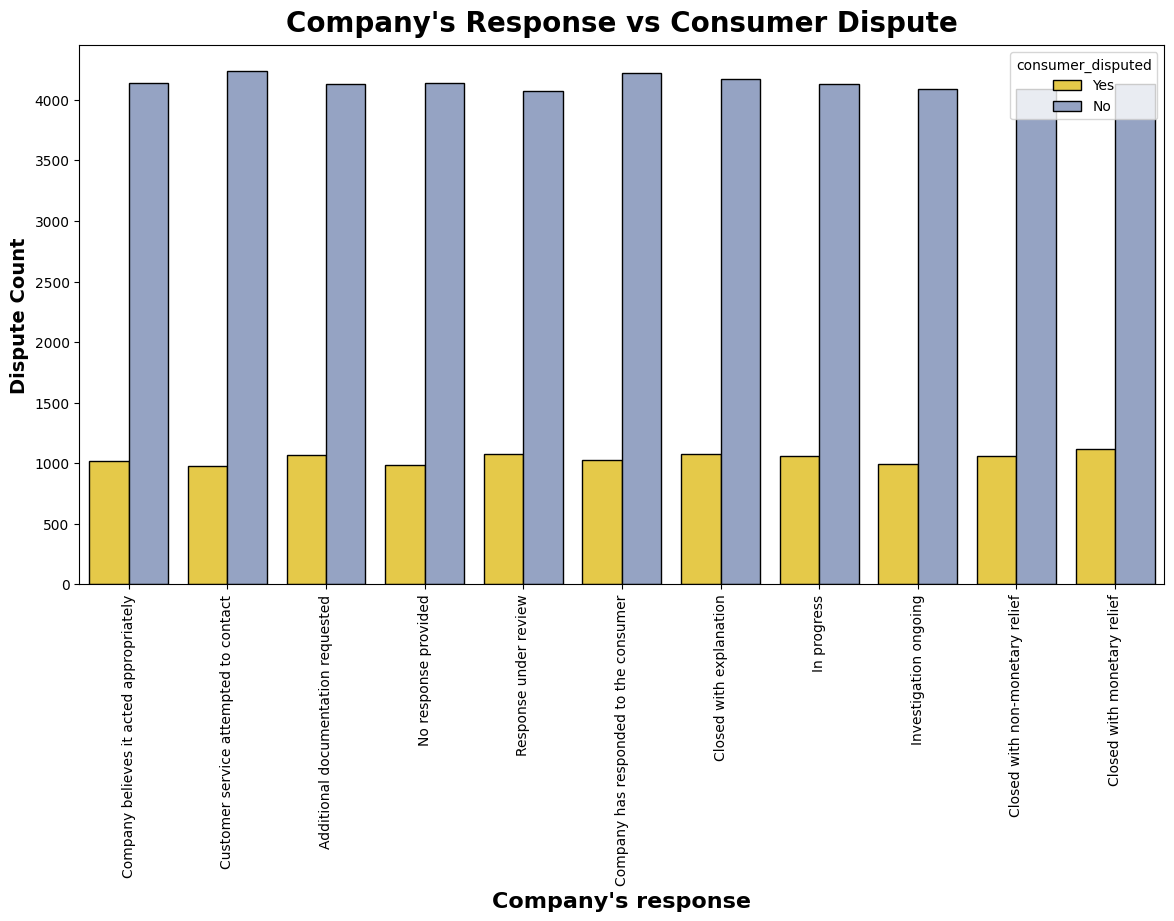

In [30]:
plt.subplots(figsize=(14,7))
sns.countplot(x='company_response',hue="consumer_disputed", data=df, ec='black', palette='Set2_r')
plt.title("Company's Response vs Consumer Dispute", weight='bold',fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Company's response", weight="bold", fontsize=16)
plt.xticks(rotation=90)

# Finance Complaint Year and Disputed Consumer's count
•   The Year the CFPB received the complaint.

•   As this is the imbalanced data. visualizing only the data in which consumer has dispute on the company's response

In [31]:
df.columns

Index(['company', 'company_response', 'consumer_consent_provided',
       'consumer_disputed', 'date_received', 'date_sent_to_company', 'issue',
       'product', 'state', 'submitted_via', 'timely'],
      dtype='object')

In [33]:
# create a copy of dispute consumer data 
viz_df = dispute_df.copy()
viz_df[ 'received_date']= pd.to_datetime (viz_df['date_received']) .dt.date 
viz_df[ 'received_month'] = pd.to_datetime (viz_df[ 'date_received']).dt.month 
viz_df[ 'received_year'] = pd.to_datetime (viz_df[ 'date_received']).dt.year

In [34]:
viz_df.head()

,company,company_response,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,submitted_via,timely,received_date,received_month,received_year
0,Portfolio Recovery Associates,None,Consent not provided,Yes,2023-08-03 00:00:00,2023-01-26 00:00:00,Billing disputes,Retail store card,TX,Postal mail,Yes,2023-08-03,8,2023
4,American Express Company,None,Consent not provided,Yes,2023-10-03 00:00:00,2022-02-26 00:00:00,Service not received,Auto loan,TX,Web,No,2023-10-03,10,2023
5,Regions Bank,None,Consent not provided,Yes,2024-05-30 00:00:00,2024-11-13 00:00:00,Problem with a credit reporting company's inve...,Business loan,MI,Web,No,2024-05-30,5,2024
18,Synchrony Financial,None,Consent provided,Yes,2023-06-26 00:00:00,2022-01-23 00:00:00,Service not received,Credit card,NC,Postal mail,No,2023-06-26,6,2023
23,Synchrony Financial,Additional documentation requested,Consent provided,Yes,2023-10-04 00:00:00,2024-05-15 00:00:00,Problems with account management,Business loan,OR,Web,Yes,2023-10-04,10,2023


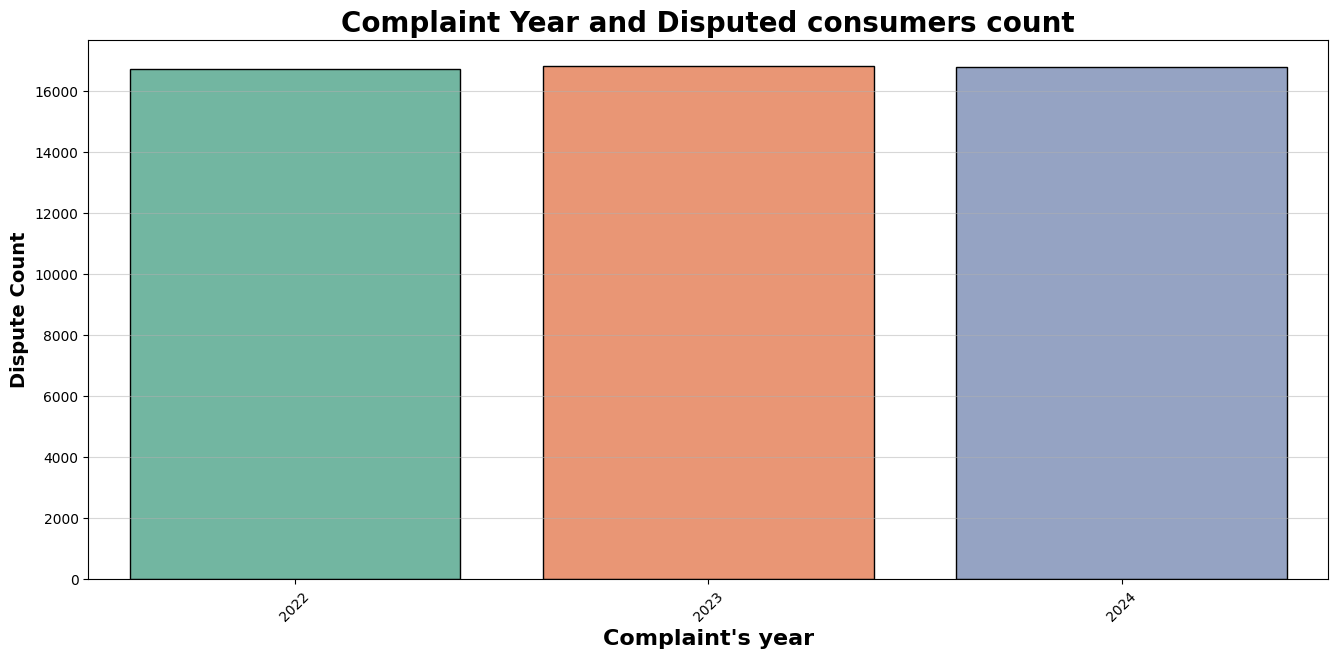

In [35]:

plt.subplots(figsize=(16,7))
sns.countplot(x="received_year", data= viz_df, palette="Set2", ec = "black") 
plt.xticks(rotation=45)
plt.title("Complaint Year and Disputed consumers count", weight="bold", fontsize=20) 
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's year", weight="bold", fontsize=16)
plt.grid (alpha = 0.5, axis= "y")
plt.show()

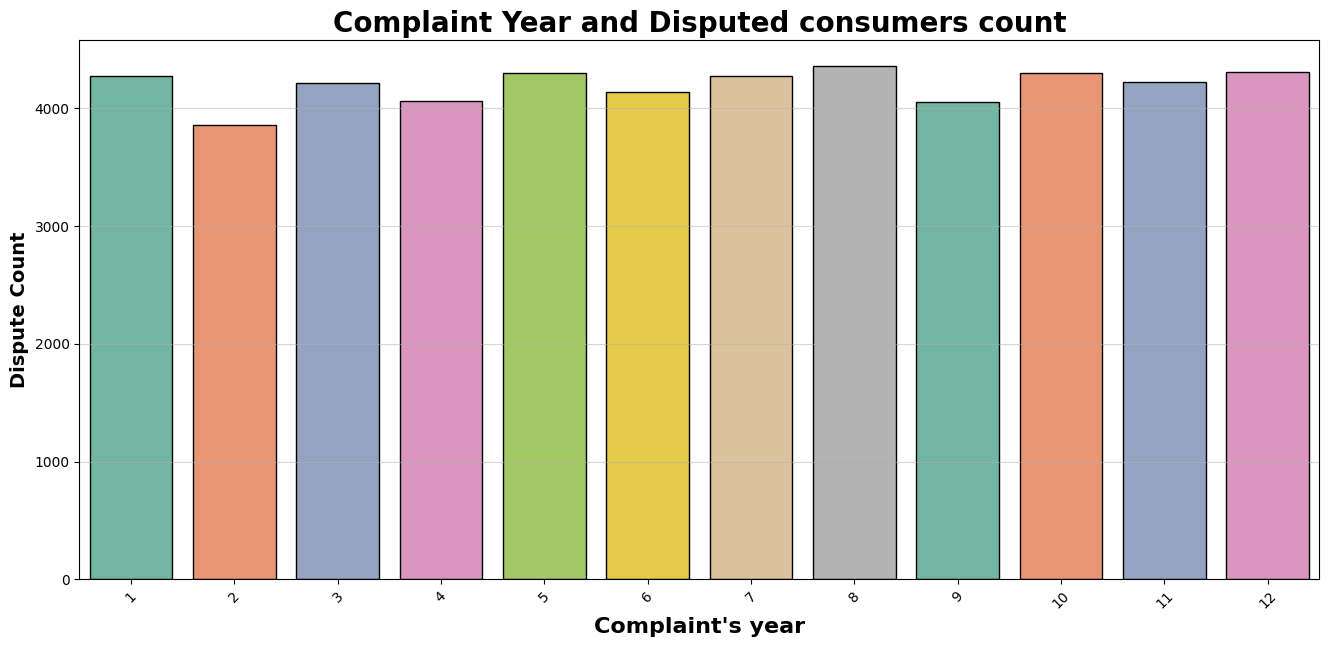

In [36]:

plt.subplots(figsize=(16,7))
sns.countplot(x="received_month", data= viz_df, palette="Set2", ec = "black") 
plt.xticks(rotation=45)
plt.title("Complaint Year and Disputed consumers count", weight="bold", fontsize=20) 
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's year", weight="bold", fontsize=16)
plt.grid (alpha = 0.5, axis= "y")
plt.show()

# Complaint Submission

In [37]:
df.submitted_via.value_counts(normalize=True).to_frame()*100

,proportion
submitted_via,
Web,52.770696
Phone,20.982154
Postal mail,20.959437
Email,5.287713


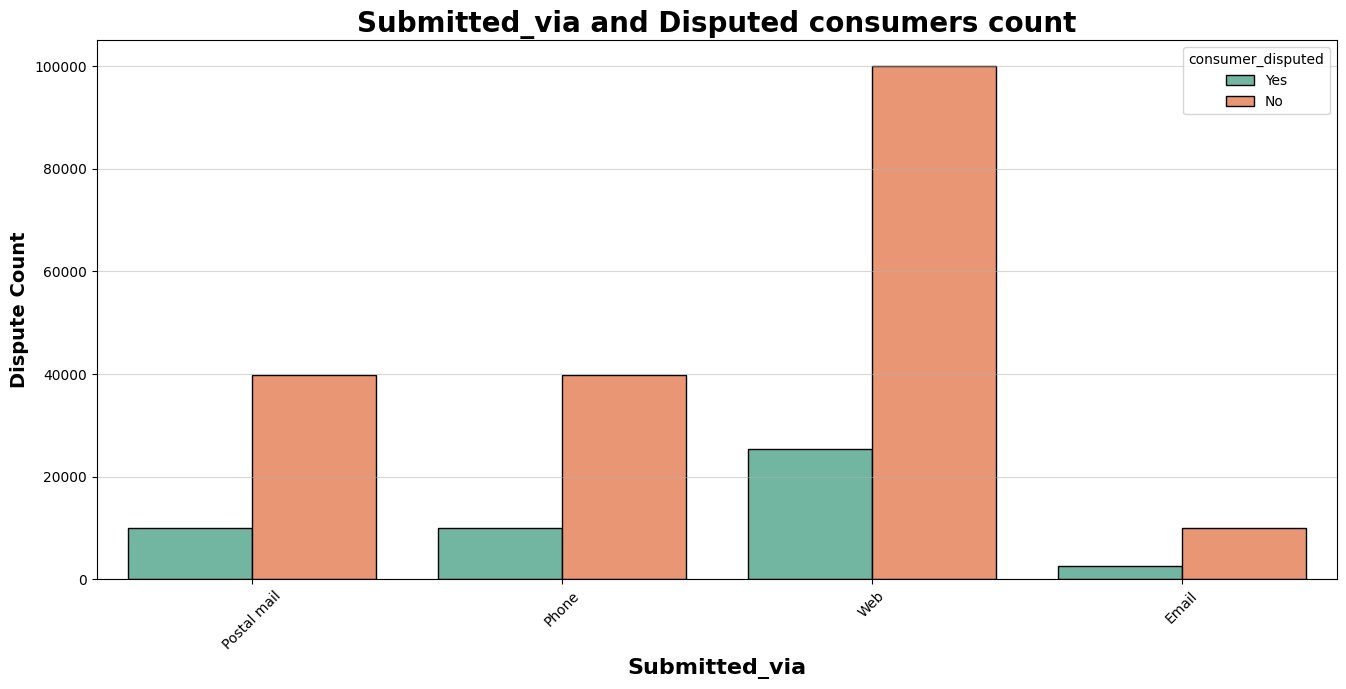

In [38]:

plt.subplots(figsize=(16,7))
sns.countplot(x="submitted_via", hue='consumer_disputed',data= df, palette="Set2", ec = "black") 
plt.xticks(rotation=45)
plt.title("Submitted_via and Disputed consumers count", weight="bold", fontsize=20) 
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Submitted_via", weight="bold", fontsize=16)
plt.grid (alpha = 0.5, axis= "y")
plt.show()

# Timely Response has an effect on Dispute or not

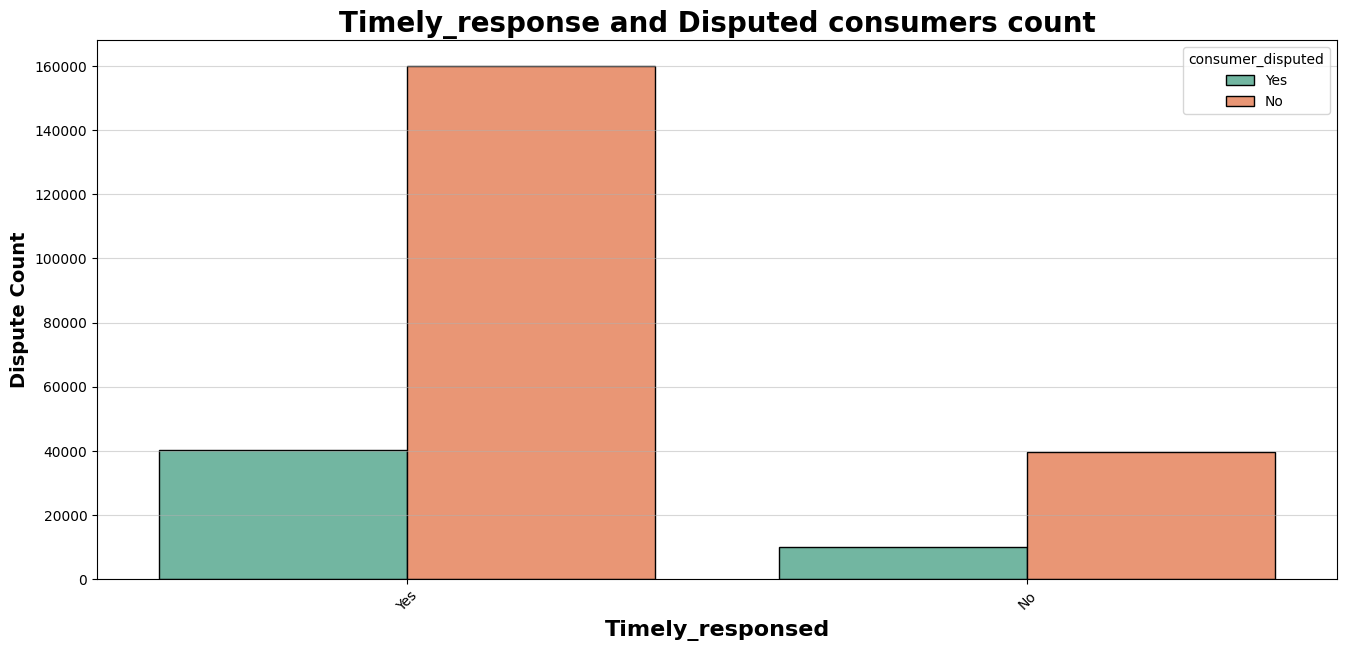

In [39]:
plt.subplots(figsize=(16,7))
sns.countplot(x="timely", hue='consumer_disputed',data= df, palette="Set2", ec = "black") 
plt.xticks(rotation=45)
plt.title("Timely_response and Disputed consumers count", weight="bold", fontsize=20) 
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Timely_responsed", weight="bold", fontsize=16)
plt.grid (alpha = 0.5, axis= "y")
plt.show()

# Consumer Consent Provided or Not

In [40]:
df.columns

Index(['company', 'company_response', 'consumer_consent_provided',
       'consumer_disputed', 'date_received', 'date_sent_to_company', 'issue',
       'product', 'state', 'submitted_via', 'timely'],
      dtype='object')

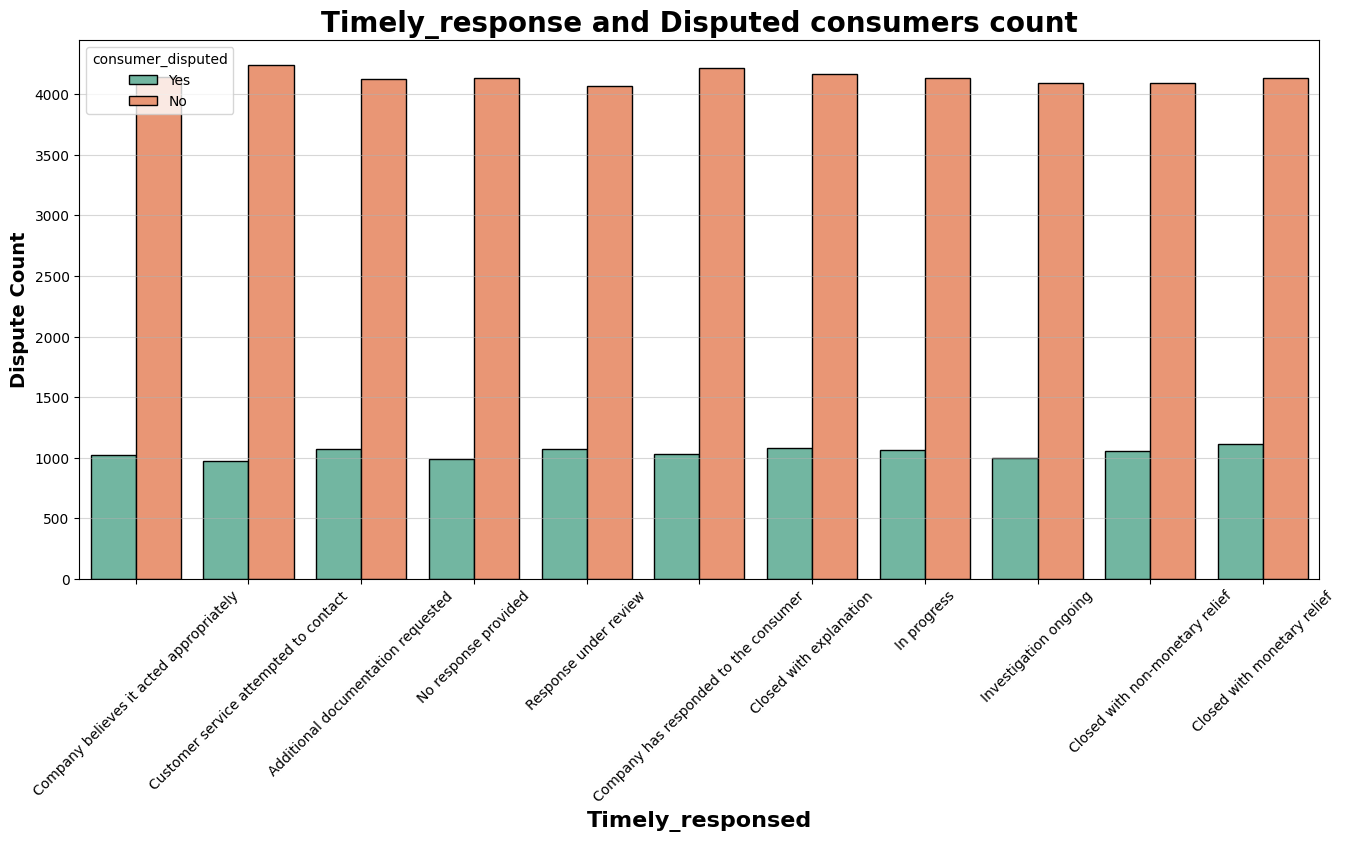

In [41]:
plt.subplots(figsize=(16,7))
sns.countplot(x="company_response", hue='consumer_disputed',data= df, palette="Set2", ec = "black") 
plt.xticks(rotation=45)
plt.title("Timely_response and Disputed consumers count", weight="bold", fontsize=20) 
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Timely_responsed", weight="bold", fontsize=16)
plt.grid (alpha = 0.5, axis= "y")
plt.show()


# Final Report

Dataset is collected from consumerfinance US government website.

tags, complaint_what_happened, company_public_response, sub_issue, sub_product, zip_code, complaint_id are the columns which can be removed asthey are redundant or doesn't help the model.

company its a name column can be removed as it contains 4284 unique values, which cannot be used in model.

new feature can be created days_to_forward_complaint which is the difference between date_sent_to_company -date_received.

issue column is a text column, so text processing can be done and vectorized by tfidf for the model training.

Null values can be imputed with mode.